## 4  
Haga un análisis de clusters con kmeans y dbscan con los datos de "coris". El análisis deberá incluir el método del codo y las métricas de validación interna

In [2]:
#Importe de librerias a utilizar
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import sklearn.utils
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

#### Descripción de los datos
Los datos del Estudio de factores de riesgo coronario (CORIS) incluyen a 462 hombres de entre 15 y 64 años de tres zonas rurales de Sudáfrica (Rousseauw et al. (1983)). La variable de respuesta Y es la presencia (Y = 1) o ausencia (Y = 0) de enfermedad coronaria. Hay 9 covariables:

* sbp- presión arterial sistólica
* tobacco tabaquismo acumulado (kg)
* ldl (colesterol unido a lipoproteínas de baja densidad)
* adiposity, adiposidad
* famhist (antecedentes familiares de enfermedad cardíaca)
* tipoa (comportamiento tipo A), 
* obesity, obesidad 
* alcohol (consumo actual de alcohol) 
* age

In [3]:
df = pd.read_csv('coris.csv', index_col=0)
#Mostramos los primeros 5 registros.
df.head(10)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
row.names,,,,,,,,,,
1,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1
6,132,6.20,6.47,36.21,1,62,30.77,14.14,45,0
7,142,4.05,3.38,16.20,0,59,20.81,2.62,38,0
8,114,4.08,4.59,14.60,1,62,23.11,6.72,58,1
9,114,0.00,3.83,19.40,1,49,24.86,2.49,29,0


In [4]:
df.columns

Index(['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity',
       'alcohol', 'age', 'chd'],
      dtype='object')

In [5]:
#Veamos el tamaño de la base
df.shape

(462, 10)

In [6]:
#Para darnos más idea de la base
df.info()
#Se puede apreciar que no hay valores nulos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462 entries, 1 to 463
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    int64  
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    int64  
dtypes: float64(5), int64(5)
memory usage: 39.7 KB


In [7]:
#En este caso, no tenemos valores NaN, 
print(df.isnull().sum().sum())
df.describe()

0


,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,0.415584,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,0.493357,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,0.000000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,0.000000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,0.000000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,1.000000,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,1.000000,78.000000,46.580000,147.190000,64.000000,1.000000


In [8]:
#Veamos la edad minima y maxima de las personas en la base
print("max: ", df['age'].max(),"min: ",df['age'].min())

max:  64 min:  15


C:\Users\milto\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


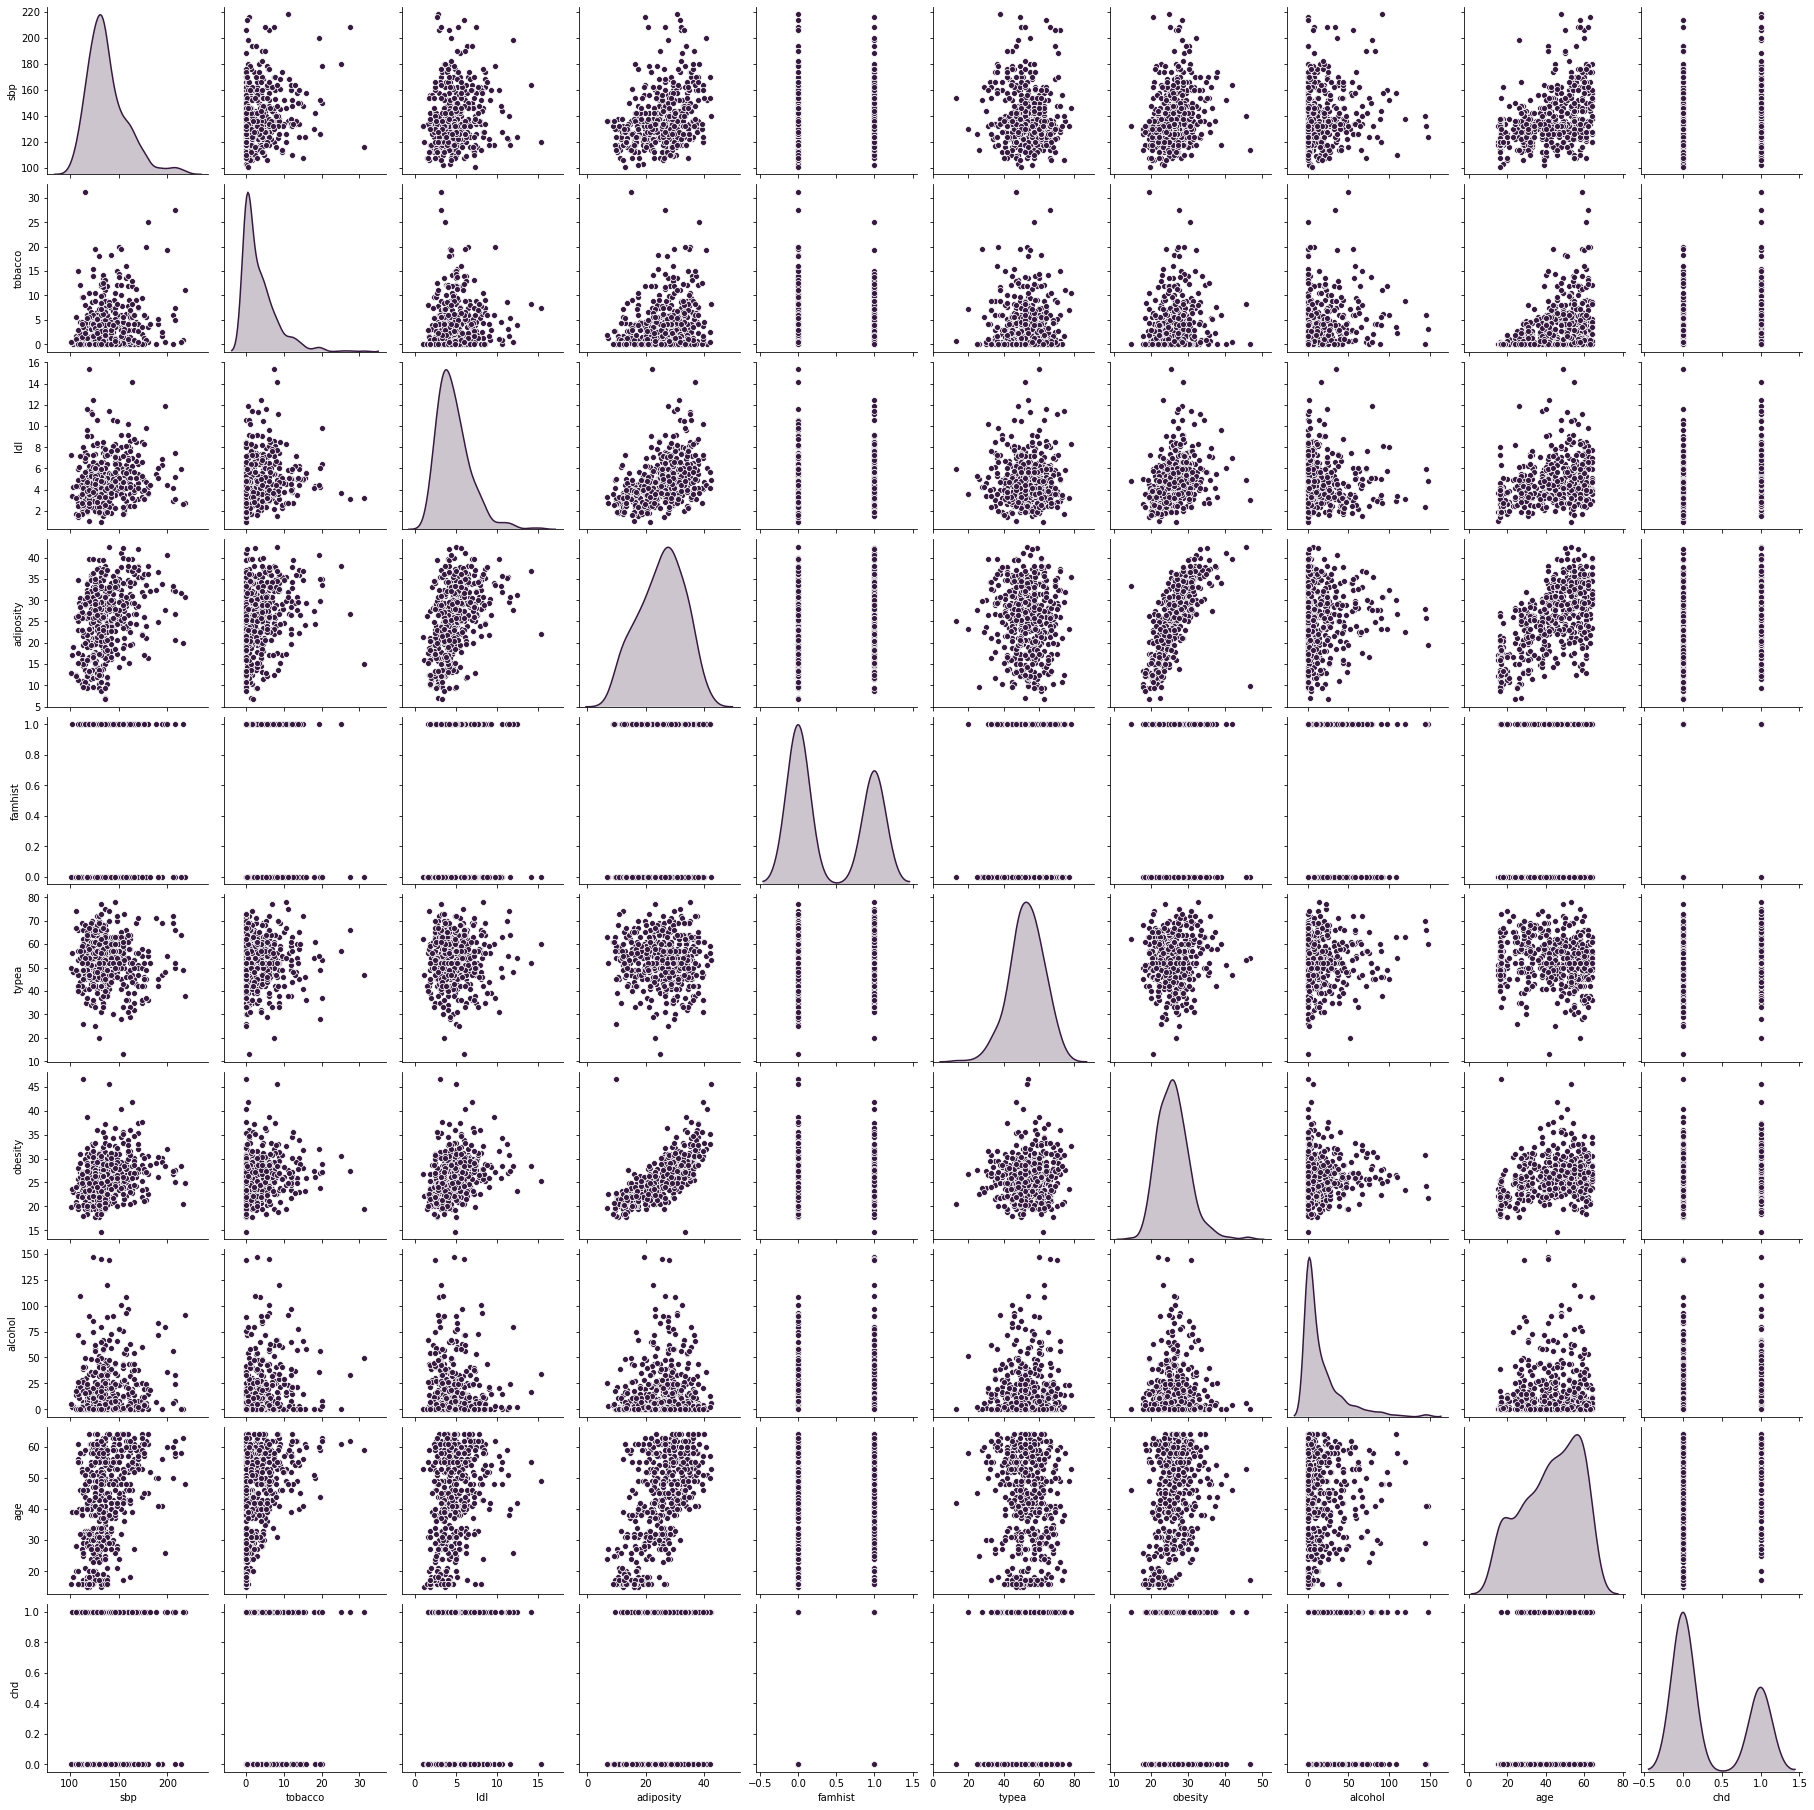

In [9]:
#Hagamos una visualizacion de la relacion que tienen cada una de las variables 
sns.set_palette("rocket")
sns.pairplot(df,diag_kind = 'kde',size=2.5)

Del grafico anterior podemos notar que no existe una clasificación como tal entre cada una de las variables, por lo que realizaremos un modelo PCA con la finalidad de encontrar alguna clasificación de grupos entre cada una de ellas.

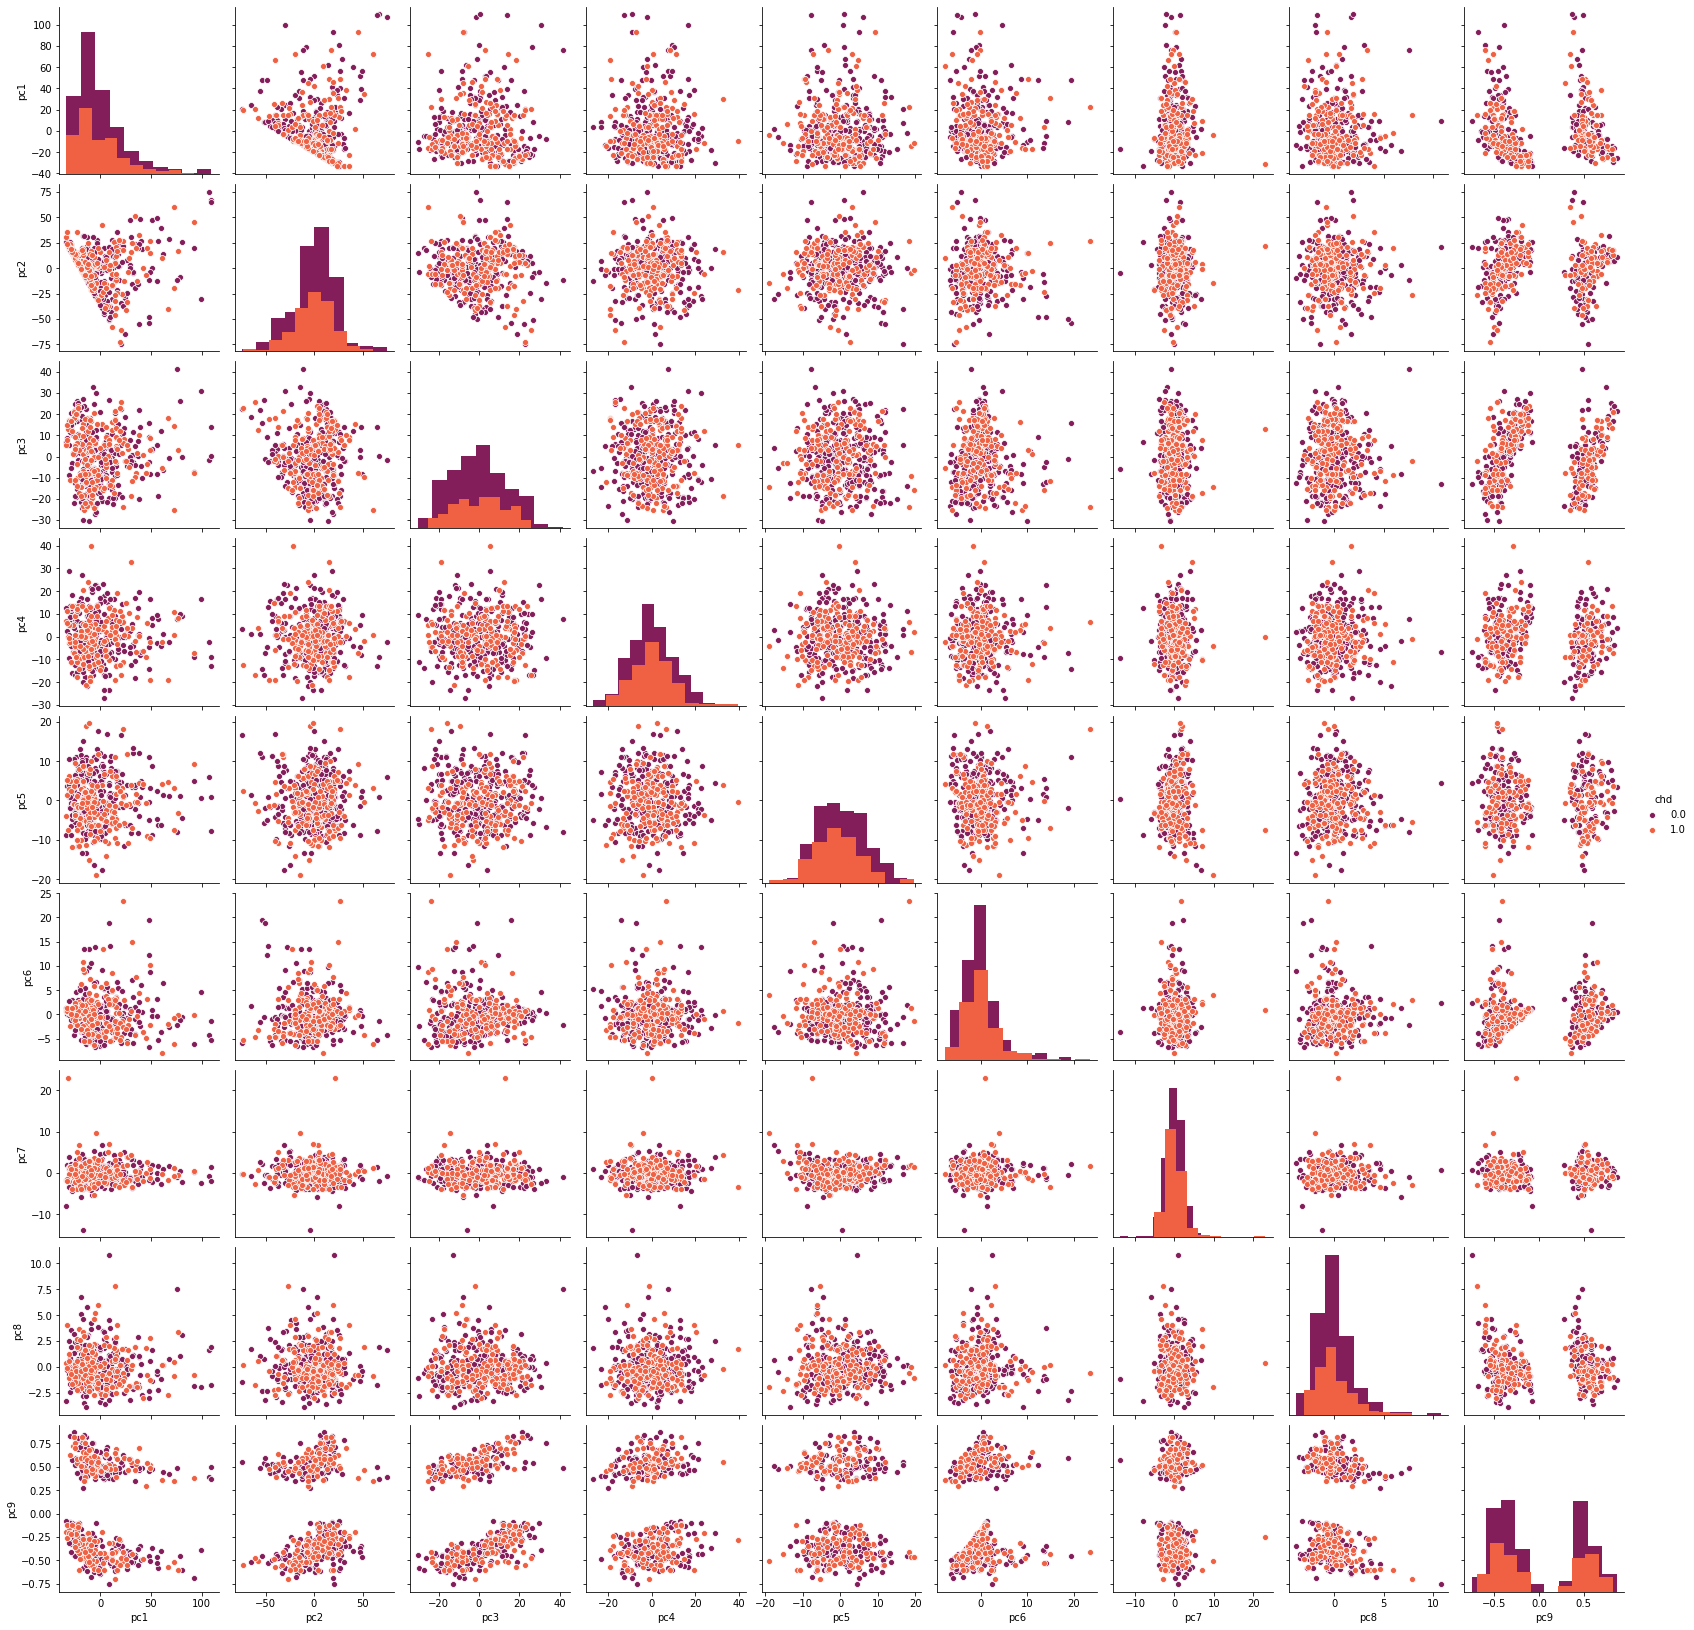

In [11]:
features = ['sbp','tobacco','ldl','adiposity','famhist','typea','obesity','alcohol','age']
keys = ['chd']
#Definimos nuestras features y a nuestra columna llave.

X = df.loc[:,features].values
Y = df.loc[:,keys].values
#Obtenemos los valores y los guardamos en una variable.
PersonaCentradoX = StandardScaler(with_mean=True,with_std=False).fit_transform(X)
pd.DataFrame(PersonaCentradoX)

#Se decide usar k=9, debido a que no conocemos que variables influyen en el contagio de enfermedades coronarias.
#Realizamos el modelo PCA
k=9
PCAPersonaCols = ['pc'+str(i+1) for i in range(0,k)]
PCAPersonaModel = PCA(n_components=k).fit(PersonaCentradoX)
PersonaDataTransPD = pd.DataFrame(data=PCAPersonaModel.transform(PersonaCentradoX),columns=PCAPersonaCols)
PCAPersonaPD = pd.concat([df,PersonaDataTransPD],axis=1)
PCAPersonaPD[:5]

smpc = sns.pairplot(PCAPersonaPD[keys+PCAPersonaCols],hue="chd",diag_kind='hist',palette="rocket")

Una vez obtenido el modelo PCA podemos partir de él y realizar nuestra gráfica de codo y brazo, identificando el numero de clusters que se deberian tener.

,k,inertia
0,1,660786.344319
1,2,464581.717521
2,3,342824.973982
3,4,282507.084526
4,5,246406.825270
5,6,226813.899451
6,7,209604.462359
7,8,197146.099979
8,9,186966.712740
9,10,175399.662603


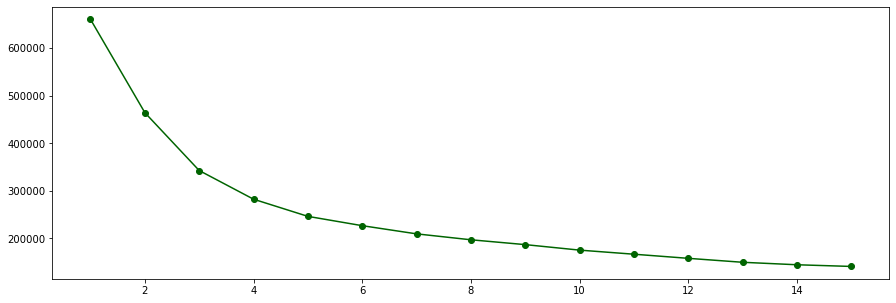

In [12]:
intertias = []
for k in list(range(1,16)):
    kmeans = KMeans(n_clusters=k).fit(df)
    intertias.append([k,kmeans.inertia_])
intertias_df = pd.DataFrame(intertias,columns=['k','inertia'])
display(intertias_df)
plt.figure(figsize=(15,5))
plt.plot(intertias_df['k'].values,intertias_df['inertia'].values,'b-o', color='darkgreen')
plt.show()

Podemos ver que el codo presenta una curvatura notable en el valor 2, lo cual quiere decir que es la cantidad de posibles clusters.

[0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1
 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1
 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1]
Coeficiente del metodo silhoutte para los clusters de la base 

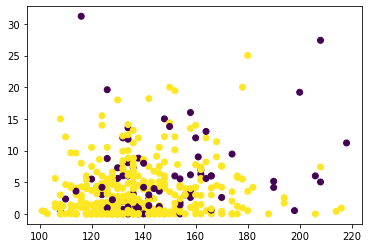

In [13]:
#Ahora veremos con valores de -1, 0, 1 la clasificación de los cluster, tomando de la grafica anterior el numero de cluster = 2
features = df.drop('chd', axis=1).values
df_kmeans = KMeans(n_clusters=2)
df_kmeans.fit(features)
labels = df_kmeans.predict(features)
print(labels)
# Evaluacion de la calidad de los cluster
silhouette = metrics.silhouette_score(features, labels, metric='euclidean')
print(f"Coeficiente del metodo silhoutte para los clusters de la base coris: {silhouette:.2f}")
#Grafica de los cluster tomando las 2 primeras covariables (sbp, tobbaco)
plt.scatter(features[:, 0], features[:, 1], c=labels, cmap='viridis')
plt.show()

De lo anterior obtuvimos que el coeficiente silhouette se encuentra entre 0 y 1, lo cual se puede decir que el numeor de cluster ajustan bien pero no del todo, pues lo ideal es que sea mas cercano a 1. Por lo tanto el numero de cluster que vimos en la grafica de codo es bueno.

In [14]:
features_XDBS = df.drop('chd', axis=1).values
df_dbscan = DBSCAN(eps=20, min_samples=10)
df_dbscan.fit(features_XDBS)
labels = df_dbscan.labels_
# El valor de -1 resultara un outlier mientras que los demás valores como 0 representaran el cluster
print(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[df_dbscan.core_sample_indices_] = True
# Para encontrar el numero de cluster sin ruido en los labels
clusters = len(set(labels))-(1 if -1 in labels else 0)
ruido = list(labels).count(-1)
#Mostramos el ruido y los clusters estimados
print("Número de clusters estimado: %d" % clusters)
print("Numero de ruido estimado: %d" % ruido)

[-1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0 -1  0 -1  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0
 -1  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0
  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0  0 -1  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 -1 -1  0 -1  0  0  0 -1  0  0  0  0  0  0
  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0 -1  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0 -1  0  0  0  0  0
  0  0 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0 -1  0  0  0
  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0 -1  0  0  0  0  0 -1  0  0  0  0  0  0  0  0

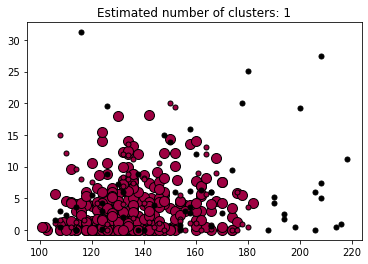

In [16]:
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = "k"
    class_member_mask = (labels == k)
    xy = features_XDBS[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=col,
    markeredgecolor="k", markersize=10)
    xy = features_XDBS[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor=col,
    markeredgecolor="k", markersize=5)
plt.title("Estimated number of clusters: %d" % clusters)
plt.show()

Podemos notar que los puntos negros son los que representan el ruido, lo cual quiere decir que son outliers y se separan demasiado del resto de los datos.  
Esto sucede si tomamos un eps de 20 y 10 variables como minimo.
No obstante si tomamos un eps menor el ruido aumentará.

[[ 0.         12.46990778 15.40687833 21.55275852 23.37970274]
 [ 0.          7.94351937  8.99462617  9.00663644  9.12541506]
 [ 0.          3.8292558   7.50555794  8.67009804  9.67638362]
 ...
 [ 0.         19.19006514 20.05705362 20.5974246  23.34817338]
 [ 0.         11.77015293 13.79132336 14.98212935 15.46677083]
 [ 0.         14.08776419 15.06897807 16.05930571 16.42565372]]


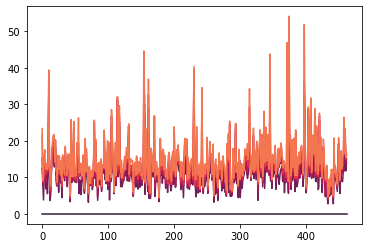

In [17]:
nearest_neighbors = NearestNeighbors(n_neighbors=5)
nearest_neighbors.fit(features_XDBS)
distancia, indices = nearest_neighbors.kneighbors(features_XDBS)
distances = np.sort(distancia, axis=0)[:, 1]
print(distancia)
plt.plot(distancia)
plt.show()

Es claro que en estas variables existe una gran varianza, provocando que la grafique resulte disparatada, o en este caso ruidosa.  

Podemos concluir que las dos variables tomadas tienen distancias muy grandes entre si, dificultando la agrupación entre estas y por ende una buena clusterización.